In [1]:
'''
data is taken from dataset27
after data.load 
first n_samples/100 were taken and saved as csv, npy 
'''
import matplotlib.pyplot as plt
from segment_encoder.tools.segment_tools import *
from segment_encoder.tools.voxel_tools import *

from segment_encoder.tools.plot_tools import *
import pickle
import os
%config InlineBackend.figure_format = 'retina'

SEGMENT_ID = 9 # which segment to show

# load small data
SMALL_DATA_DIR = r'./segment_encoder/small_data'

with open(os.path.join(SMALL_DATA_DIR, 'segments.csv'), "rb") as f:
    segments_pointcloud = pickle.load(f)

positions = np.load(os.path.join(SMALL_DATA_DIR, 'positions.npy'))
classes = np.load(os.path.join(SMALL_DATA_DIR, 'classes.npy'))
features = np.load(os.path.join(SMALL_DATA_DIR, 'features.npy'))
duplicate_classes = np.load(os.path.join(SMALL_DATA_DIR, 'duplicate_classes.npy'))
n_classes = classes.shape[0]

In [2]:
segments_pointcloud = segments_pointcloud[:10]

# plot small batch of segments

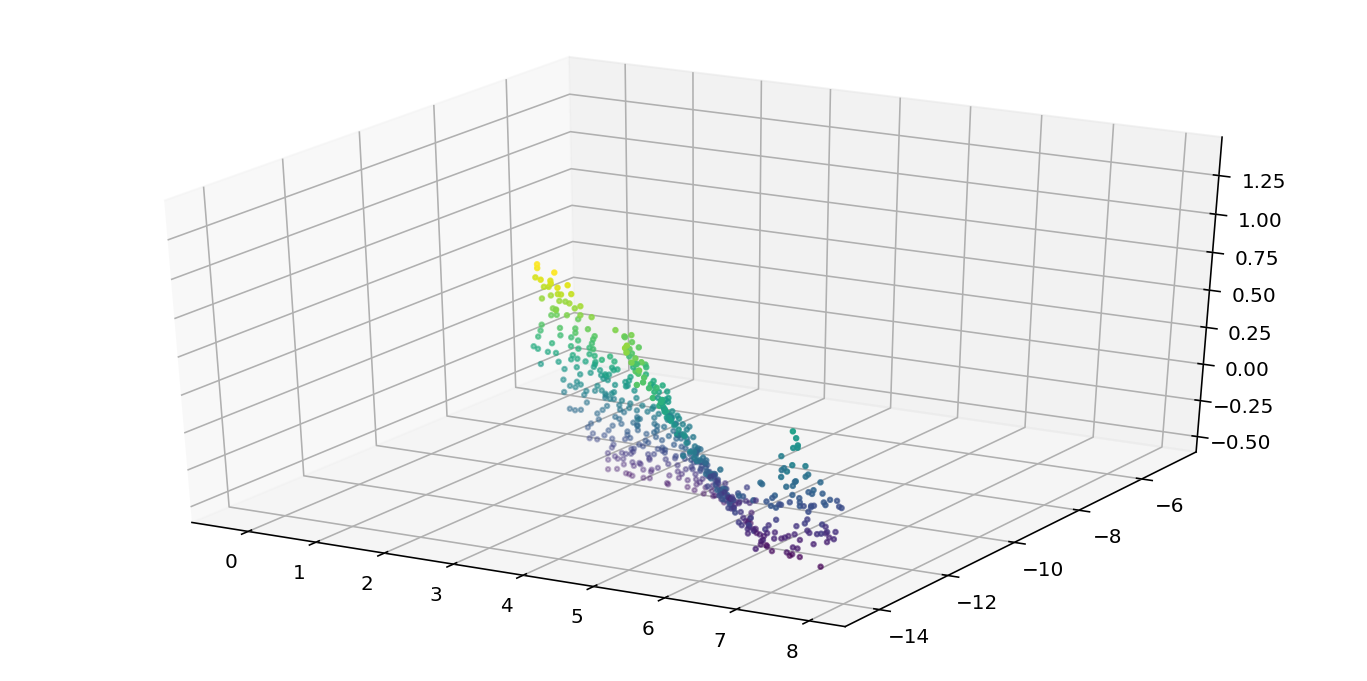

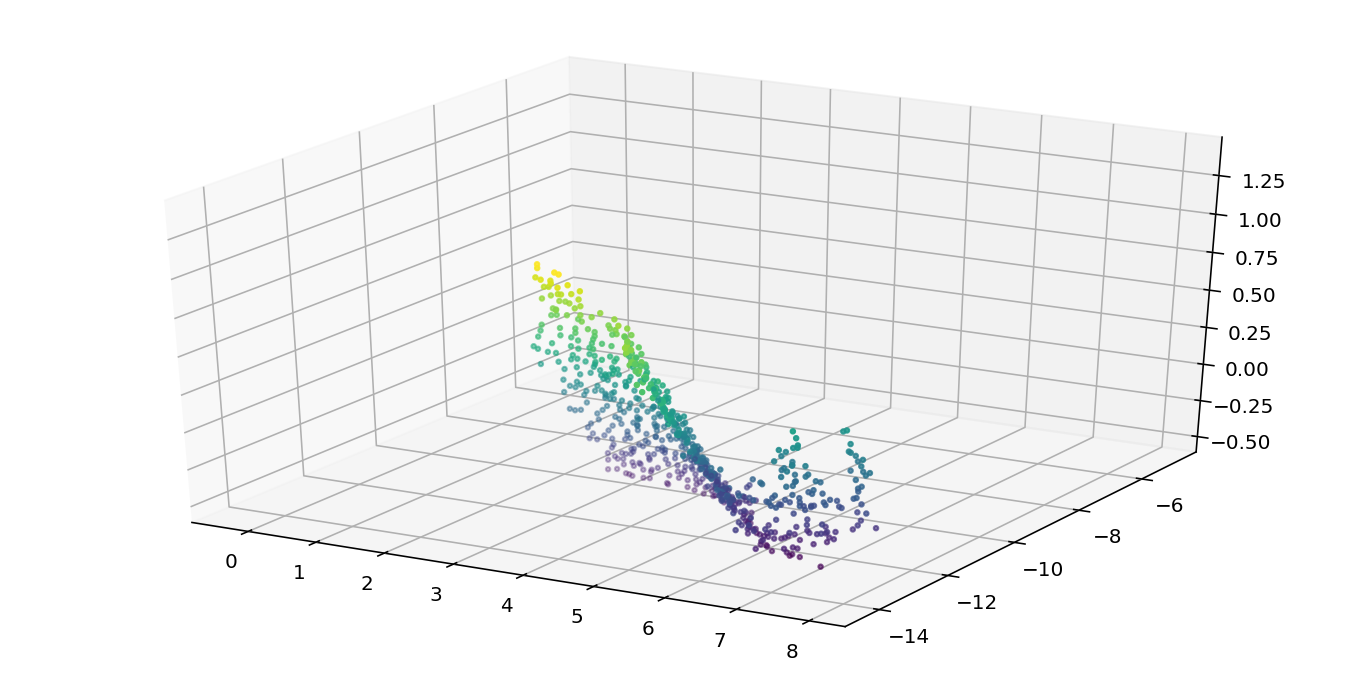

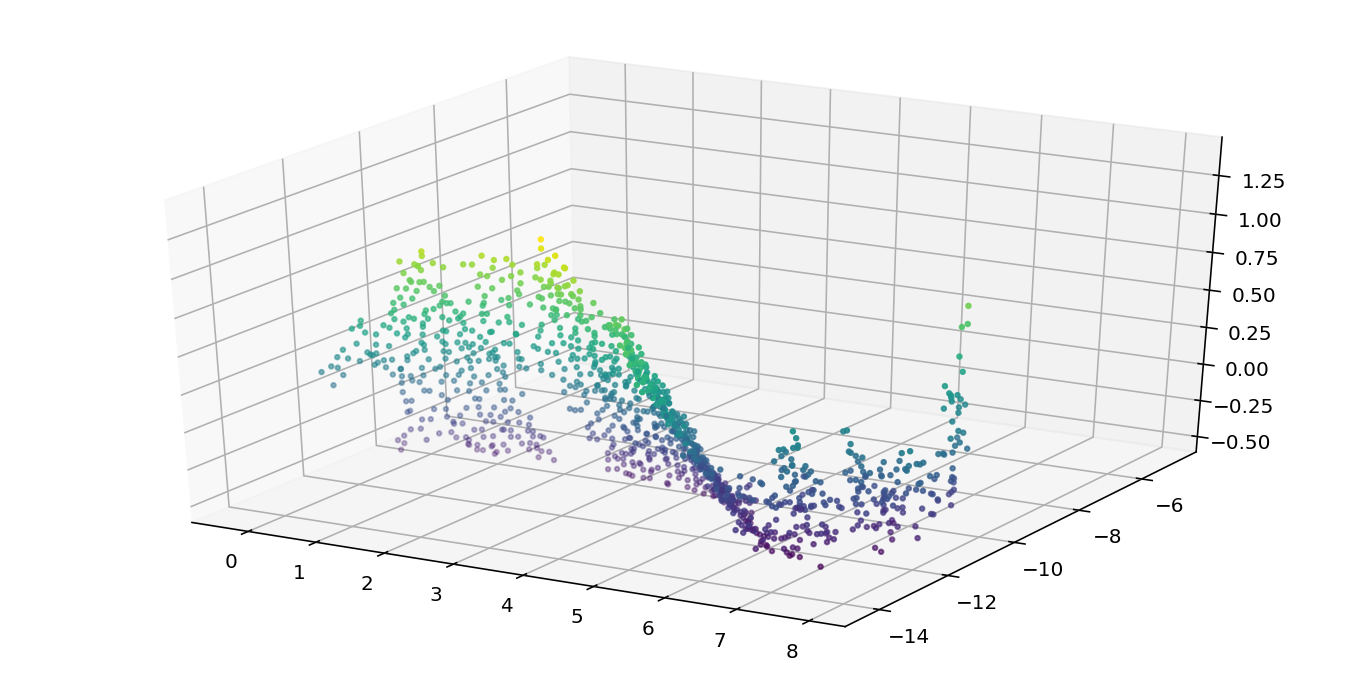

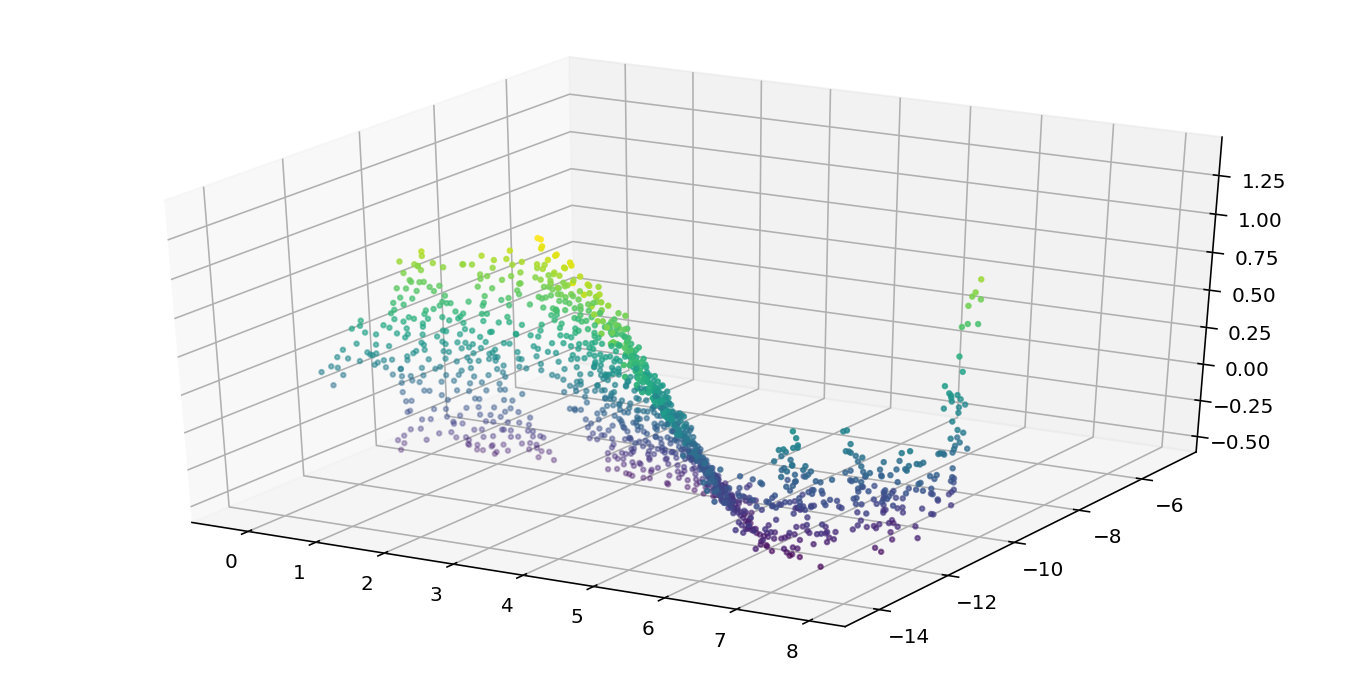

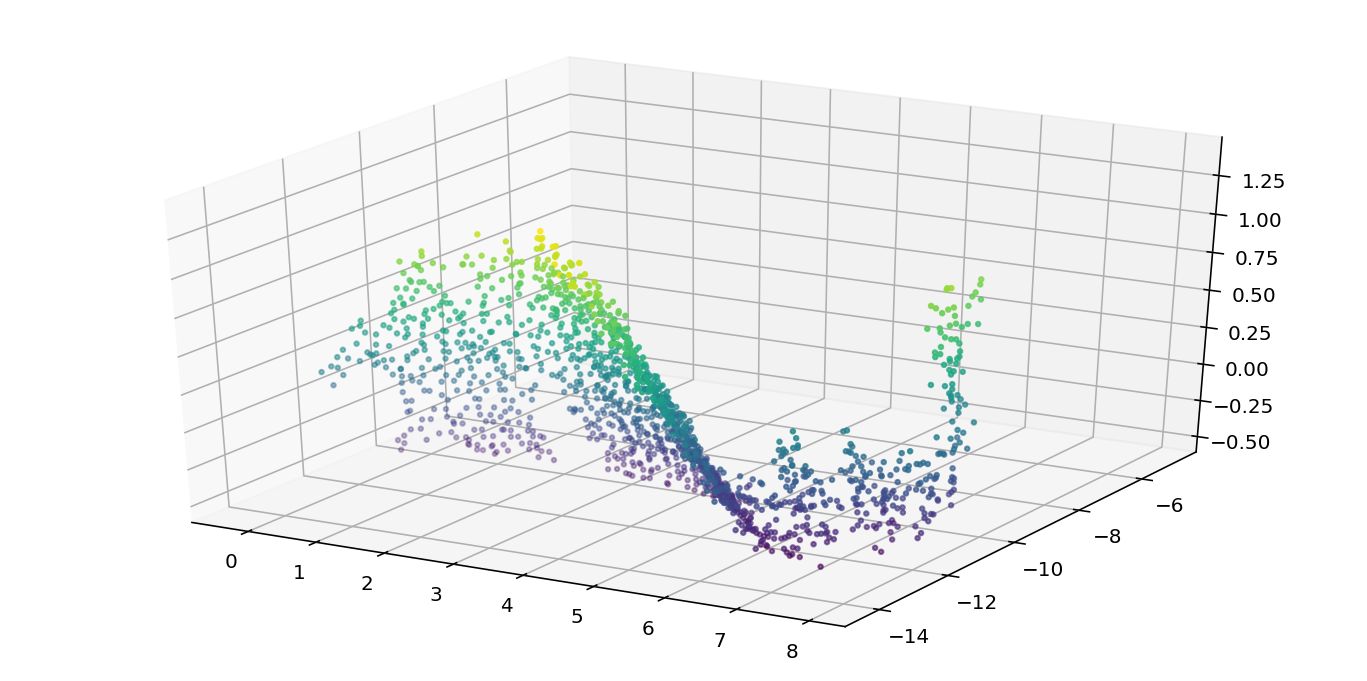

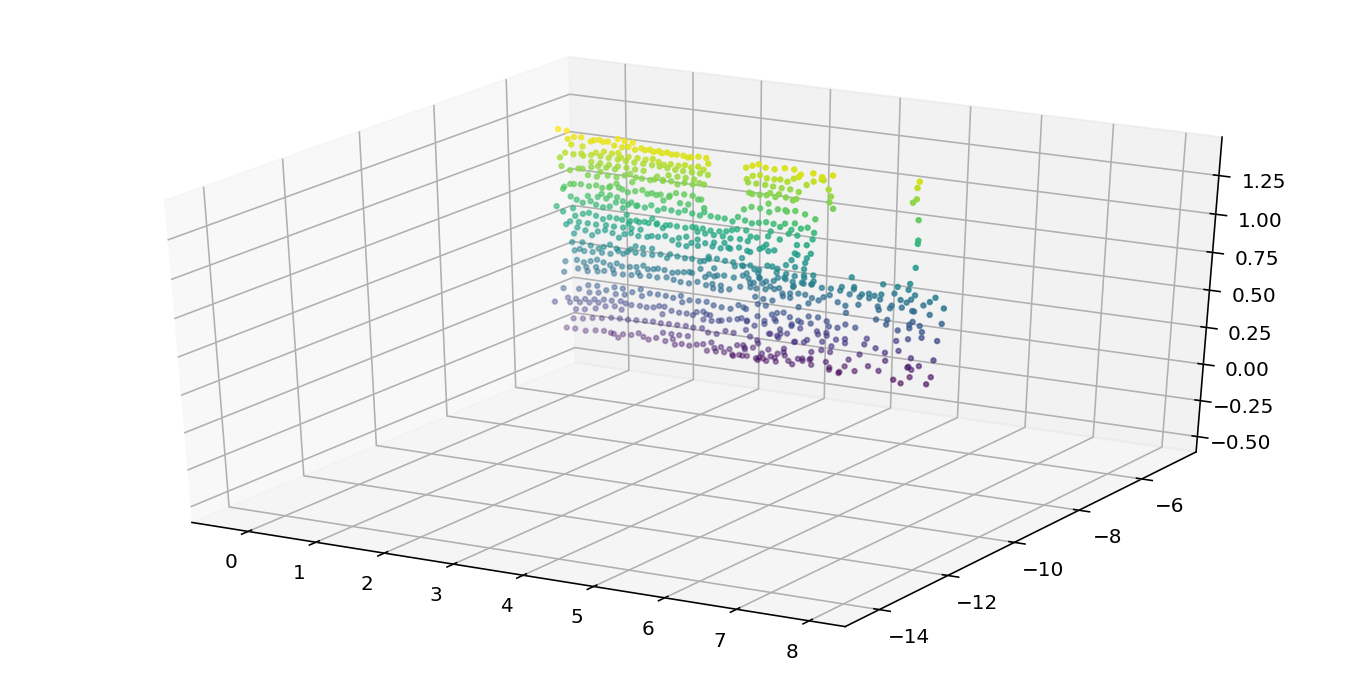

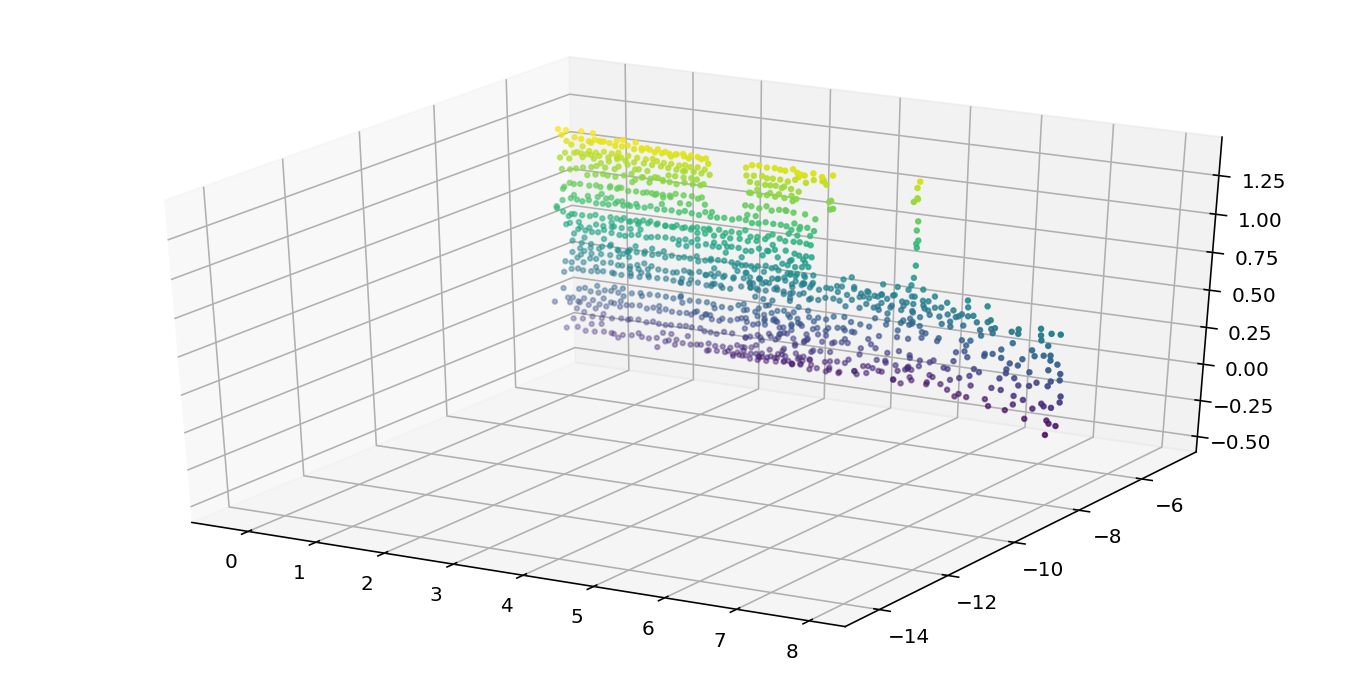

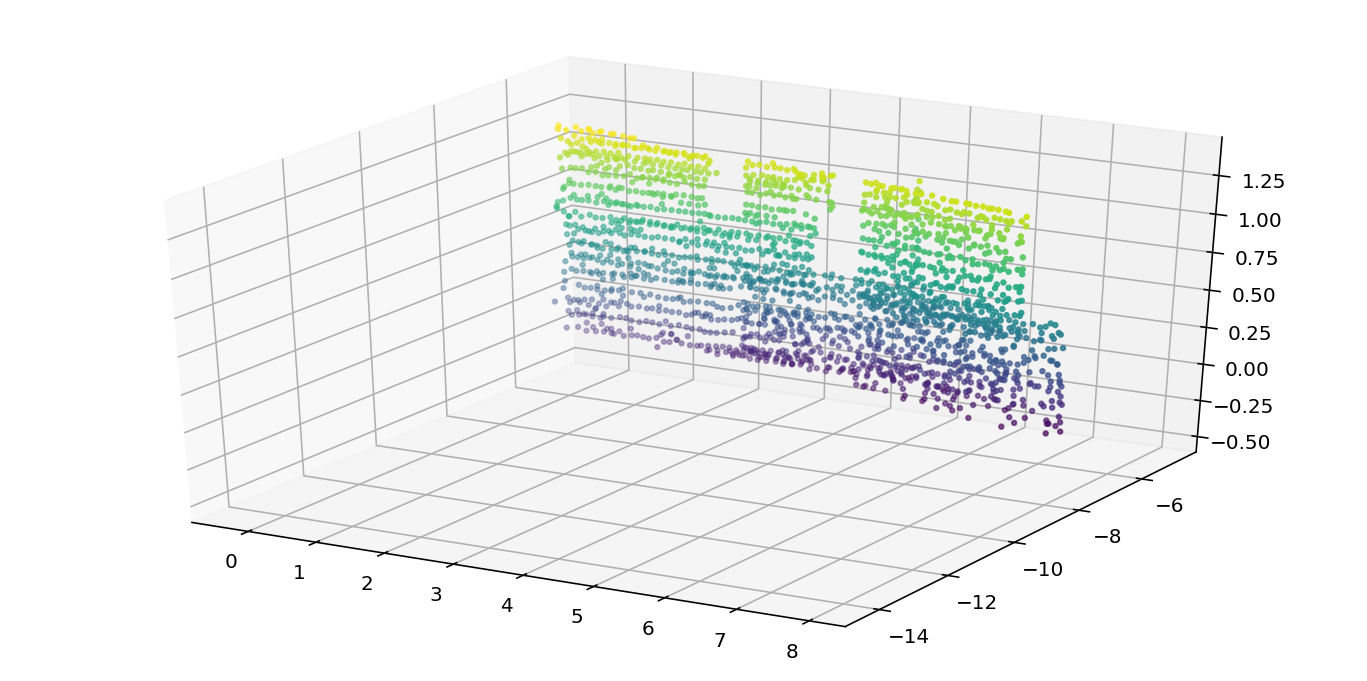

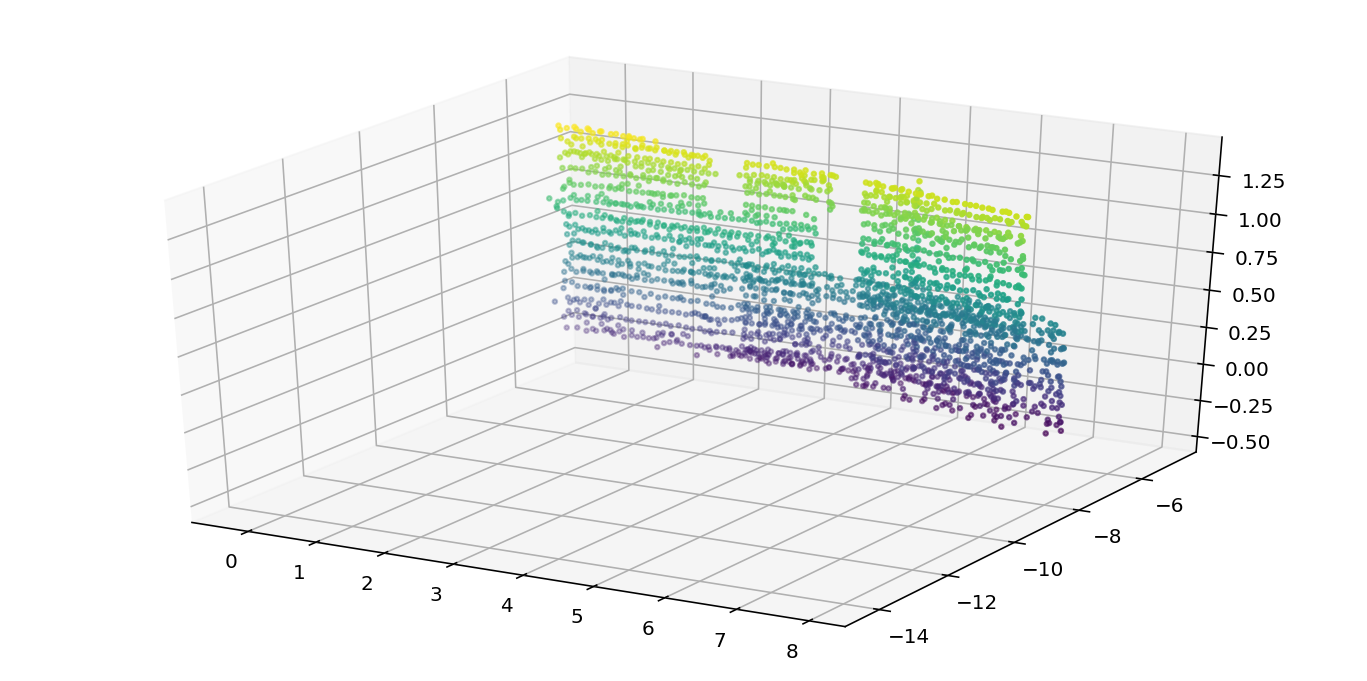

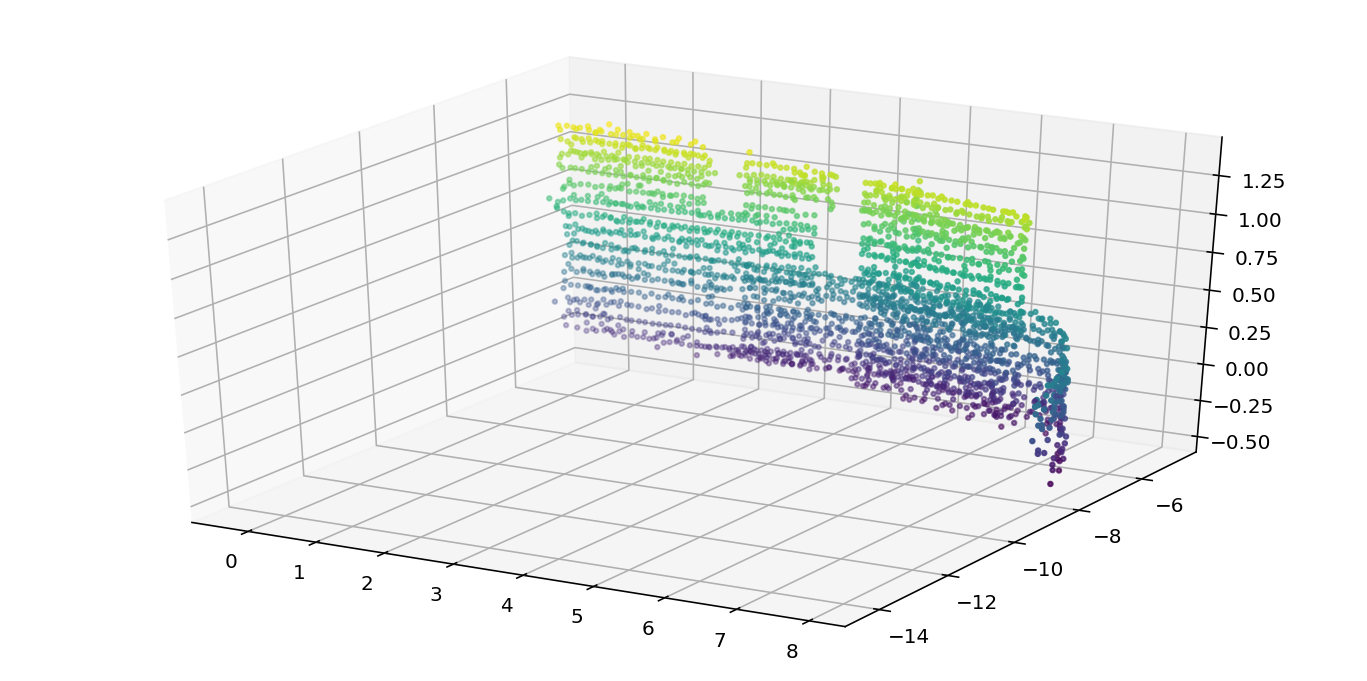

In [3]:
plot_segments_pcl(segments_pointcloud, extra_info='initial')

# Train pipeline step by step
## RandomRemover()
## PlaneRemover()
## EigenAligner()
## RandomRotator()
## CoordinatesRescaler()
## Voxelizer()

In [4]:
segment_pointcloud = segments_pointcloud[SEGMENT_ID]
segment_pointcloud.shape

(2729, 3)

Segment 9 initial

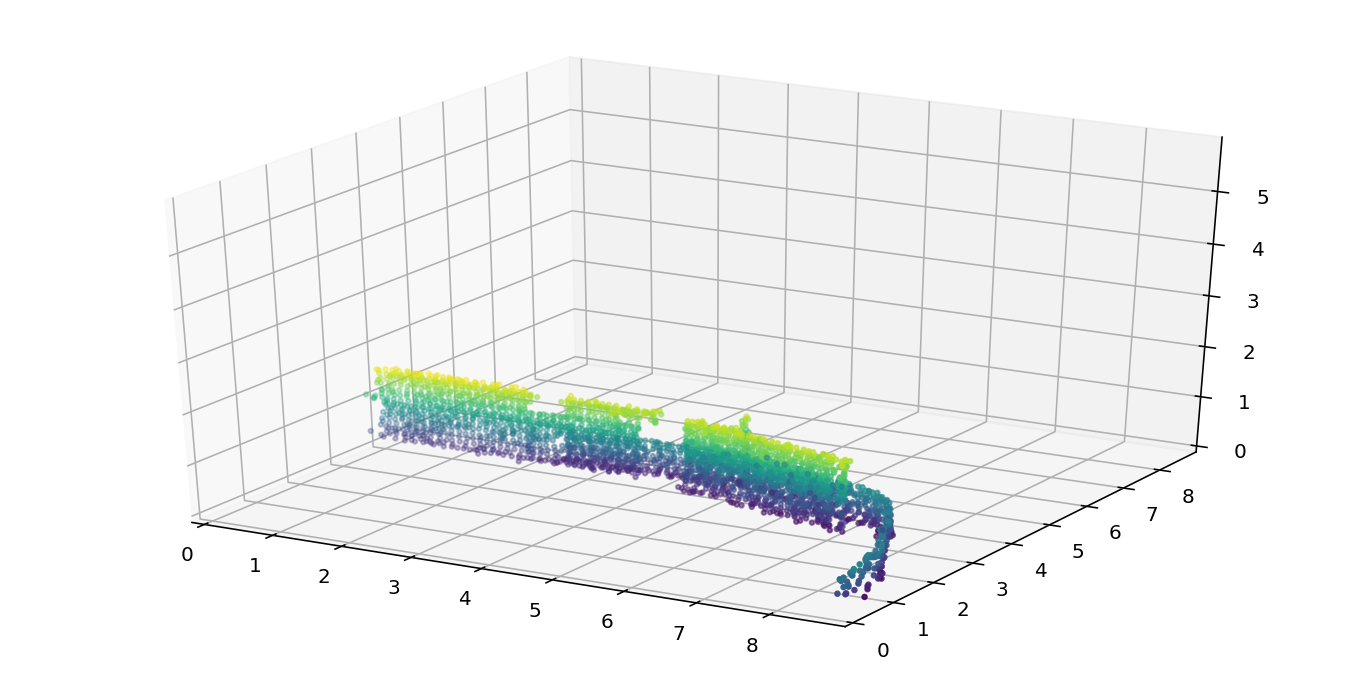

In [5]:
plot_segment_pcl(segment_pointcloud, extra_info='initial', segment_id=SEGMENT_ID)

In [6]:
segments_pointcloud = RandomRemover().fit_transform(segments_pointcloud)
segment_pointcloud = segments_pointcloud[SEGMENT_ID]
segment_pointcloud.shape

(2644, 3)

Segment 9 RandomRemover

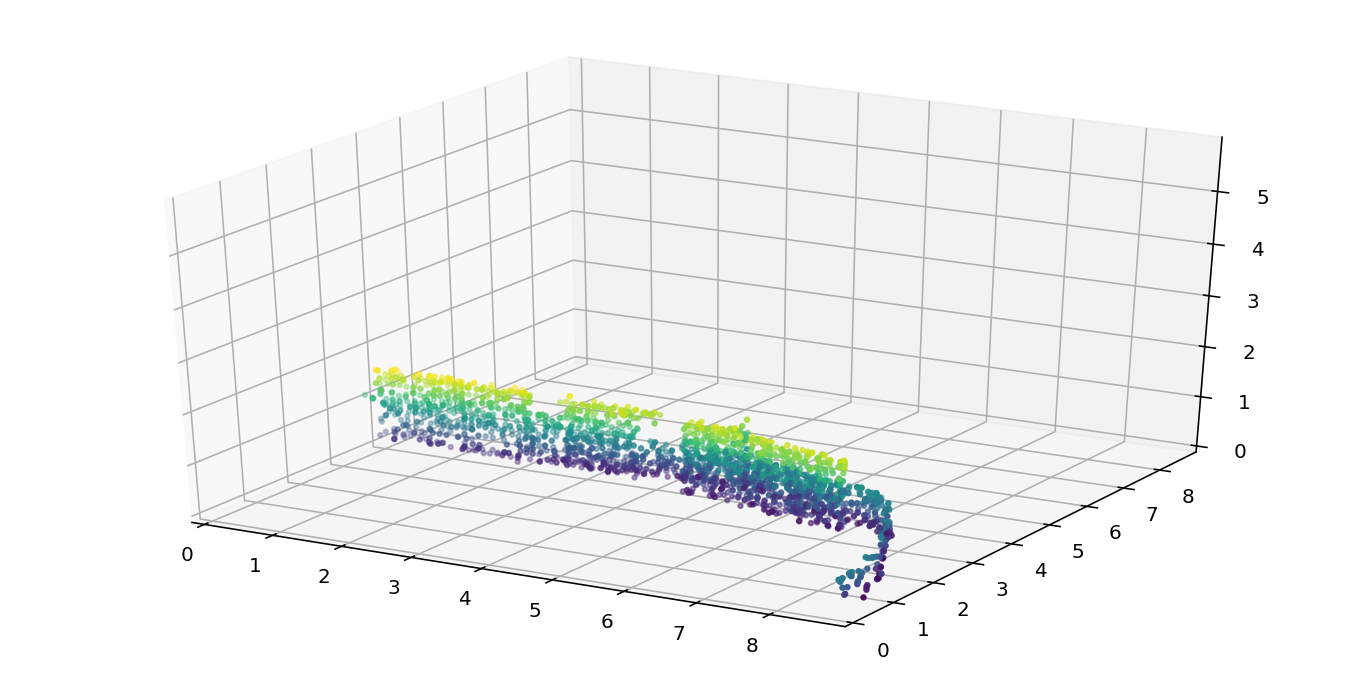

In [7]:
plot_segment_pcl(segment_pointcloud, extra_info='RandomRemover', segment_id=SEGMENT_ID)

In [8]:
segments_pointcloud = PlaneRemover().fit_transform(segments_pointcloud)
segment_pointcloud = segments_pointcloud[SEGMENT_ID]
segment_pointcloud.shape

(2405, 3)

Segment 9 PlaneRemover

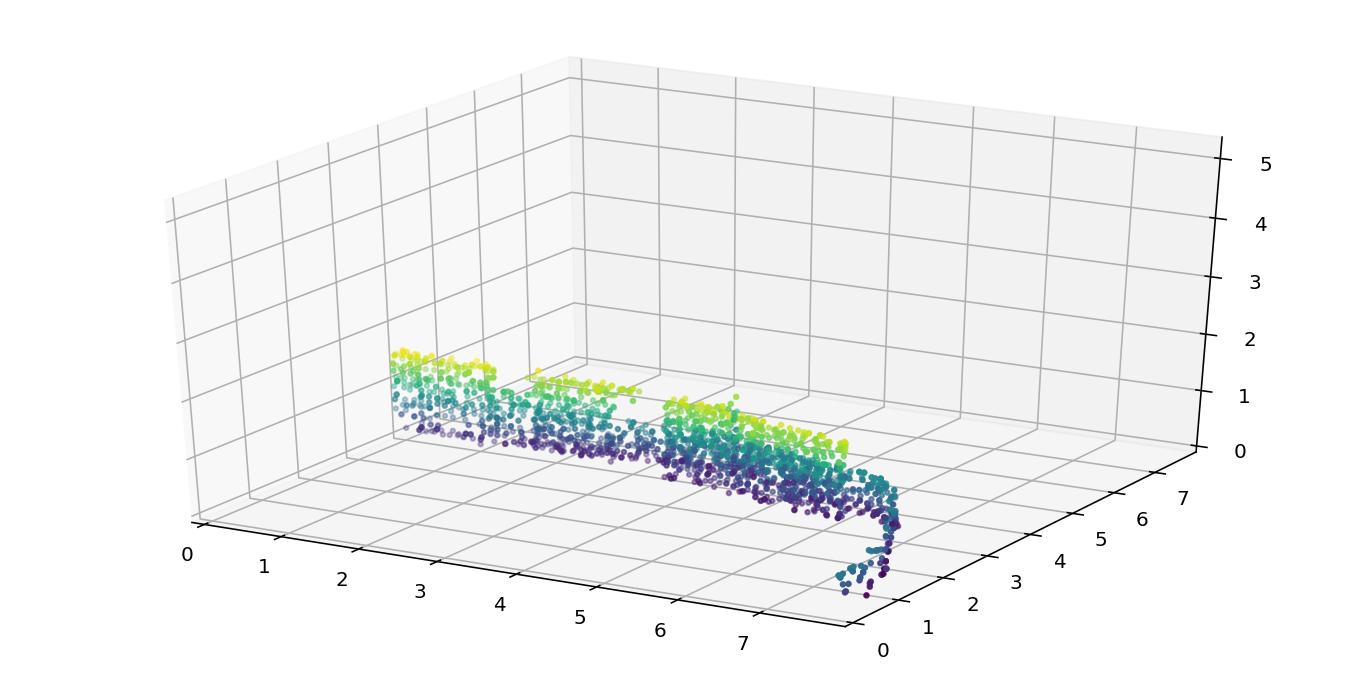

In [9]:
plot_segment_pcl(segment_pointcloud, extra_info='PlaneRemover', segment_id=SEGMENT_ID)

In [10]:
segments_pointcloud = EigenAligner().fit_transform(segments_pointcloud)
segment_pointcloud = segments_pointcloud[SEGMENT_ID]
segment_pointcloud.shape

(2405, 3)

Segment 9 EigenAligner

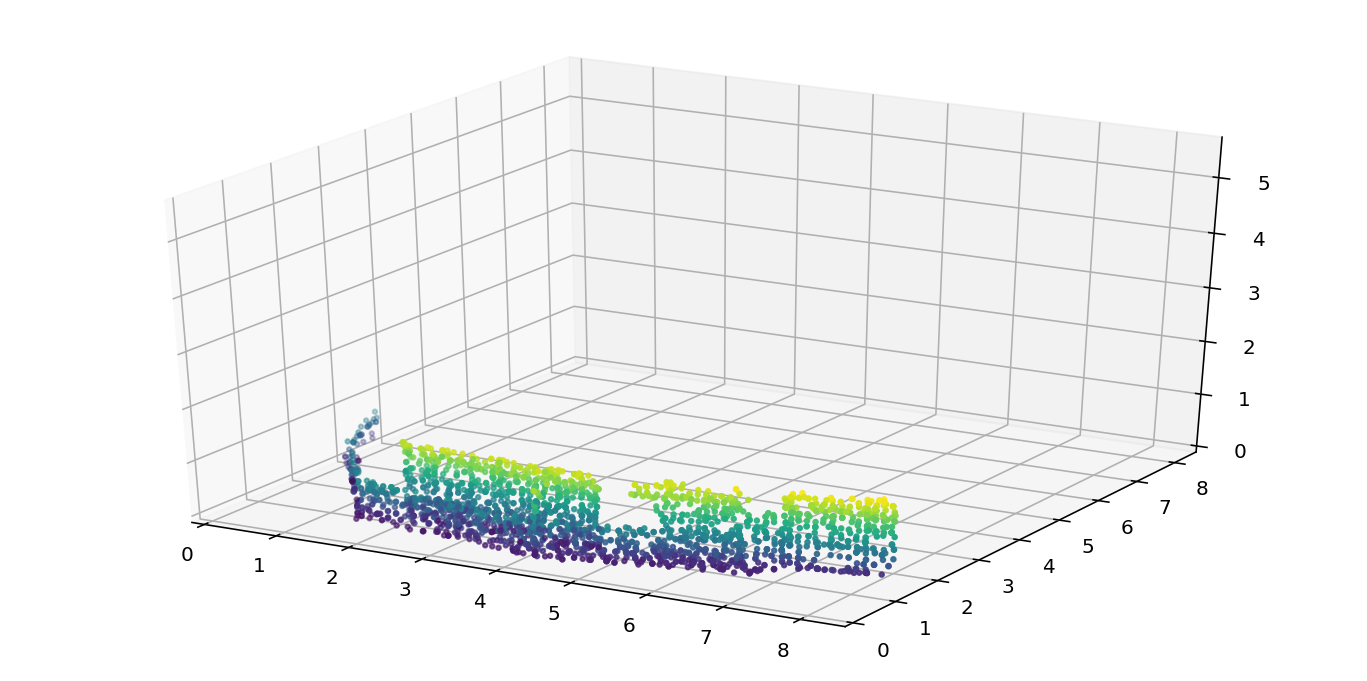

In [11]:
plot_segment_pcl(segment_pointcloud, extra_info='EigenAligner', segment_id=SEGMENT_ID)

In [12]:
segments_pointcloud = RandomRotator().fit_transform(segments_pointcloud)
segment_pointcloud = segments_pointcloud[SEGMENT_ID]
segment_pointcloud.shape

(2405, 3)

Segment 9 RandomRotator

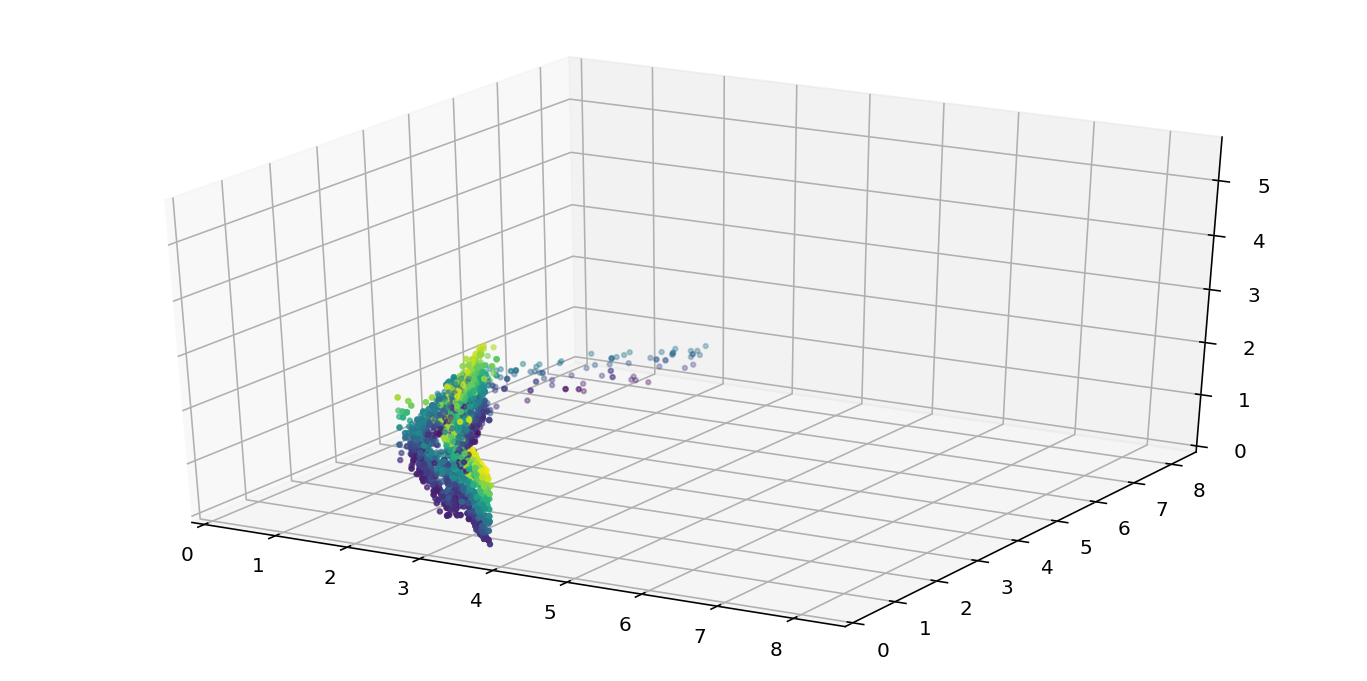

In [13]:
plot_segment_pcl(segment_pointcloud, extra_info='RandomRotator', segment_id=SEGMENT_ID)

In [14]:
coordinates_scaler = CoordinatesRescaler(scale_method = "fixed",
                    center_method = "mean",
                    scale = np.array((8,8,4)),
                    voxel_shape = np.array((32, 32, 16)),
                    min_scale_threshold = np.array((3.2, 3.2, 1.6)))

segments_pointcloud = coordinates_scaler.fit_transform(segments_pointcloud)
segment_pointcloud = segments_pointcloud[SEGMENT_ID]
segment_pointcloud.shape

(2405, 3)

Segment 9 CoordinatesRescaler

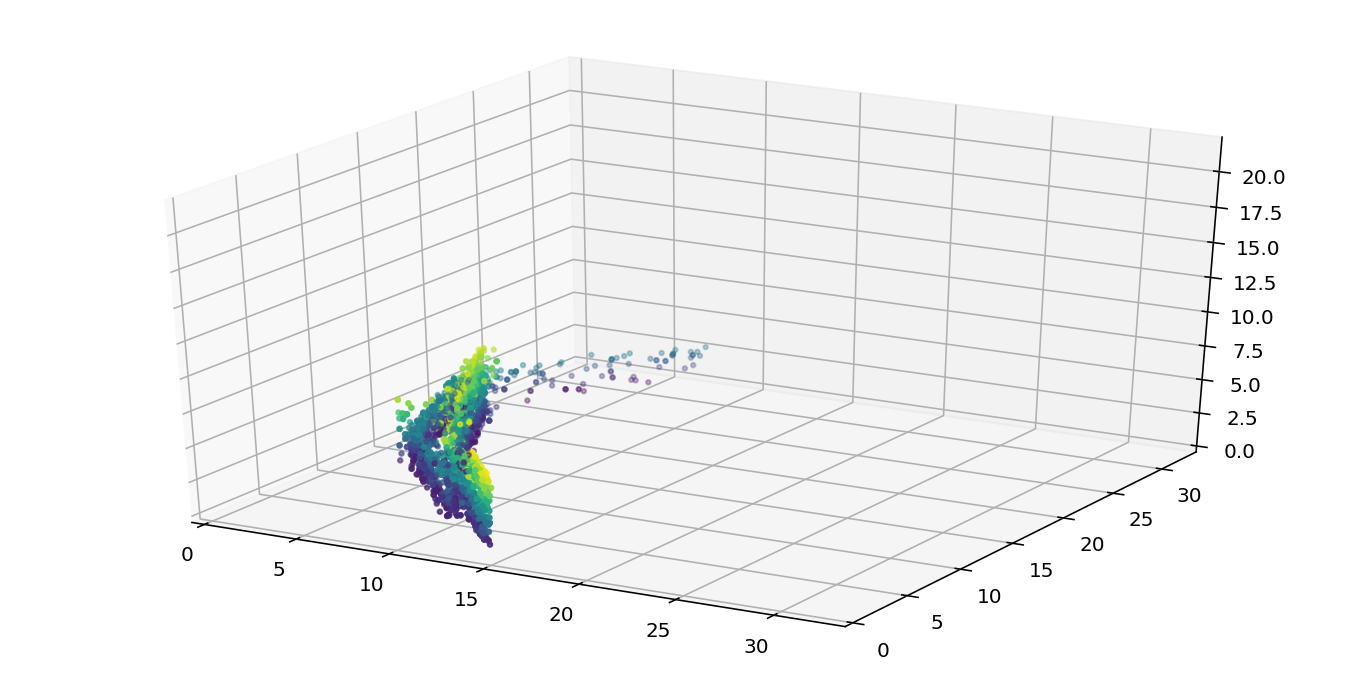

In [15]:
plot_segment_pcl(segment_pointcloud, extra_info='CoordinatesRescaler', segment_id=SEGMENT_ID)

In [16]:
segments_voxelbox = Voxelizer().fit_transform(segments_pointcloud)
segment_voxelbox = segments_voxelbox[SEGMENT_ID]
segment_voxelbox.shape

(32, 32, 16)

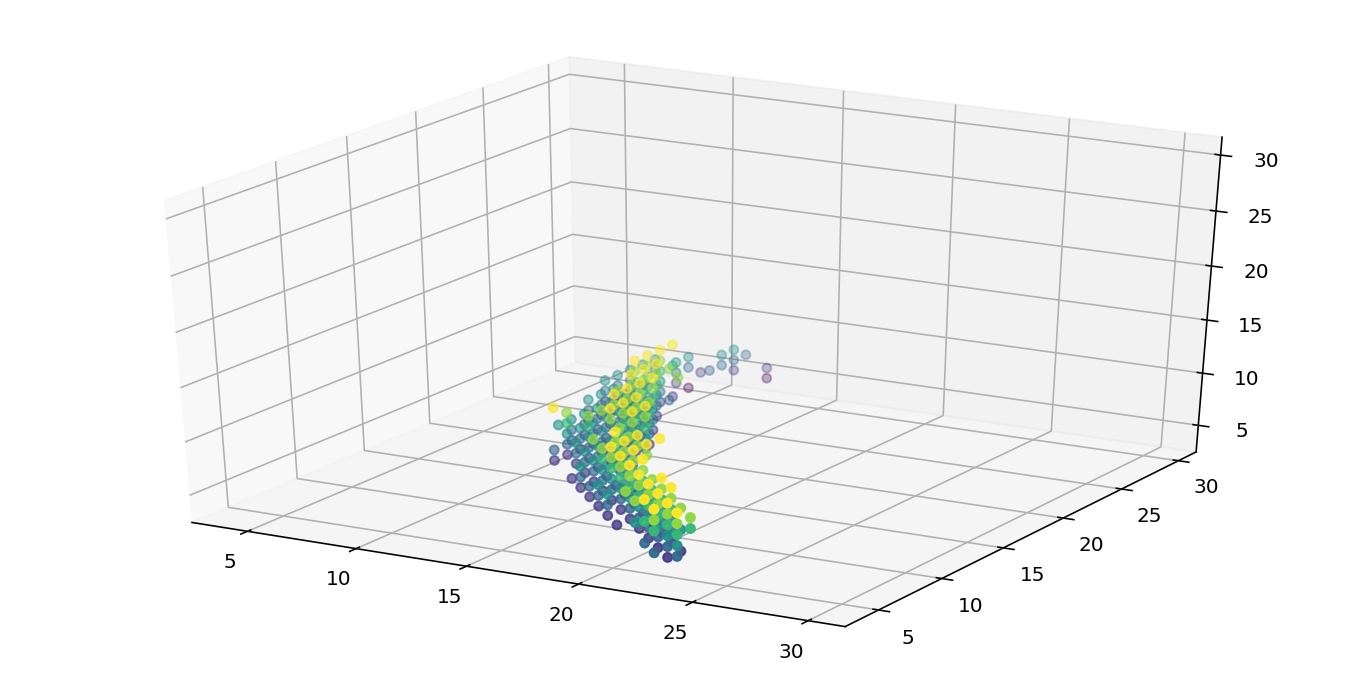

In [17]:
plot_segment_voxelbox(voxelbox=segment_voxelbox)

In [18]:
# plot_segment_voxelboxes(voxelboxes=segments_voxelbox)

# Test pipeline step by step
## EigenAligner()
## CoordinatesRescaler()
## Voxelizer()

In [19]:
segments_pointcloud = EigenAligner().fit_transform(segments_pointcloud)
segment_pointcloud = segments_pointcloud[SEGMENT_ID]
print(segment_pointcloud.shape)

(2405, 3)


Segment 9 CoordinatesRescaler

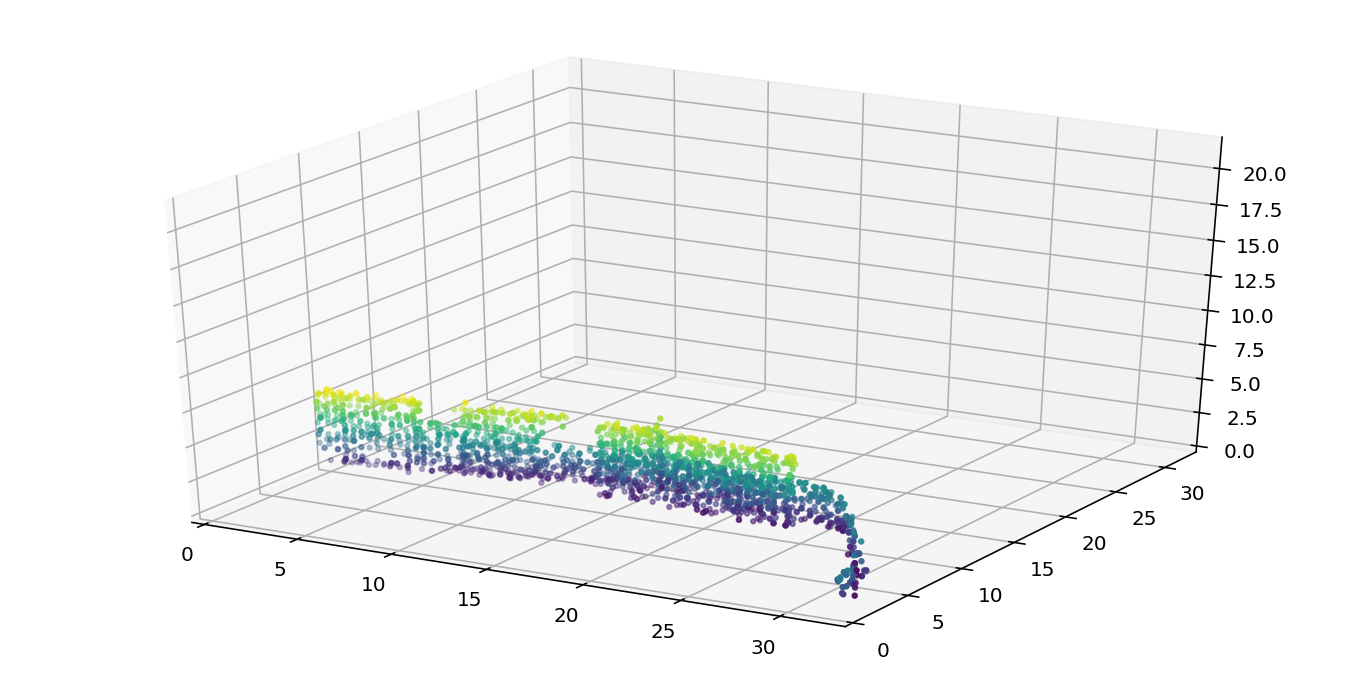

In [20]:
plot_segment_pcl(segment_pointcloud, extra_info='CoordinatesRescaler', segment_id=SEGMENT_ID)

In [21]:
coordinates_scaler = CoordinatesRescaler(scale_method = "fixed",
                    center_method = "mean",
                    scale = np.array((8,8,4)),
                    voxel_shape = np.array((32, 32, 16)),
                    min_scale_threshold = np.array((3.2, 3.2, 1.6)))
segments_pointcloud = coordinates_scaler.fit_transform(segments_pointcloud)
segment_pointcloud = segments_pointcloud[SEGMENT_ID]
print(segment_pointcloud.shape)

(2405, 3)


Segment 9 CoordinatesRescaler

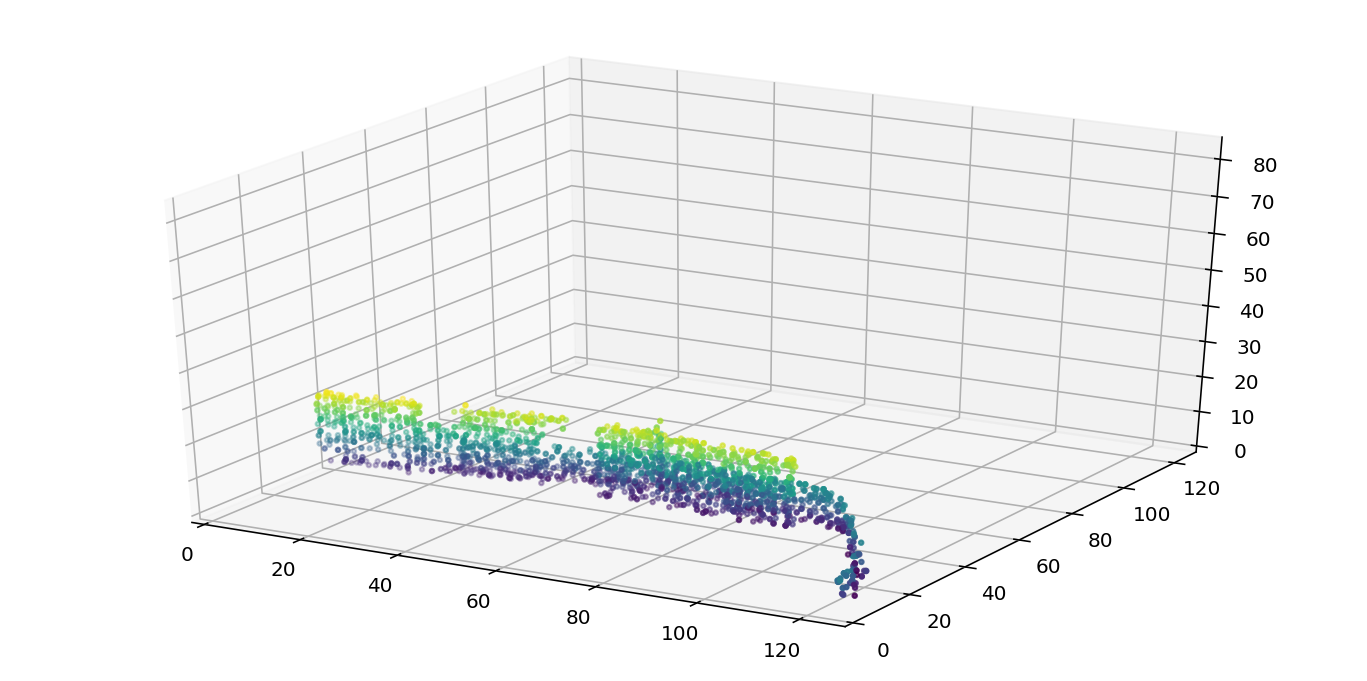

In [22]:
plot_segment_pcl(segment_pointcloud, extra_info='CoordinatesRescaler', segment_id=SEGMENT_ID)

In [23]:
segments_voxelbox = Voxelizer().fit_transform(segments_pointcloud)
segment_voxelbox = segments_voxelbox[SEGMENT_ID]
print(segment_voxelbox.shape)

(32, 32, 16)


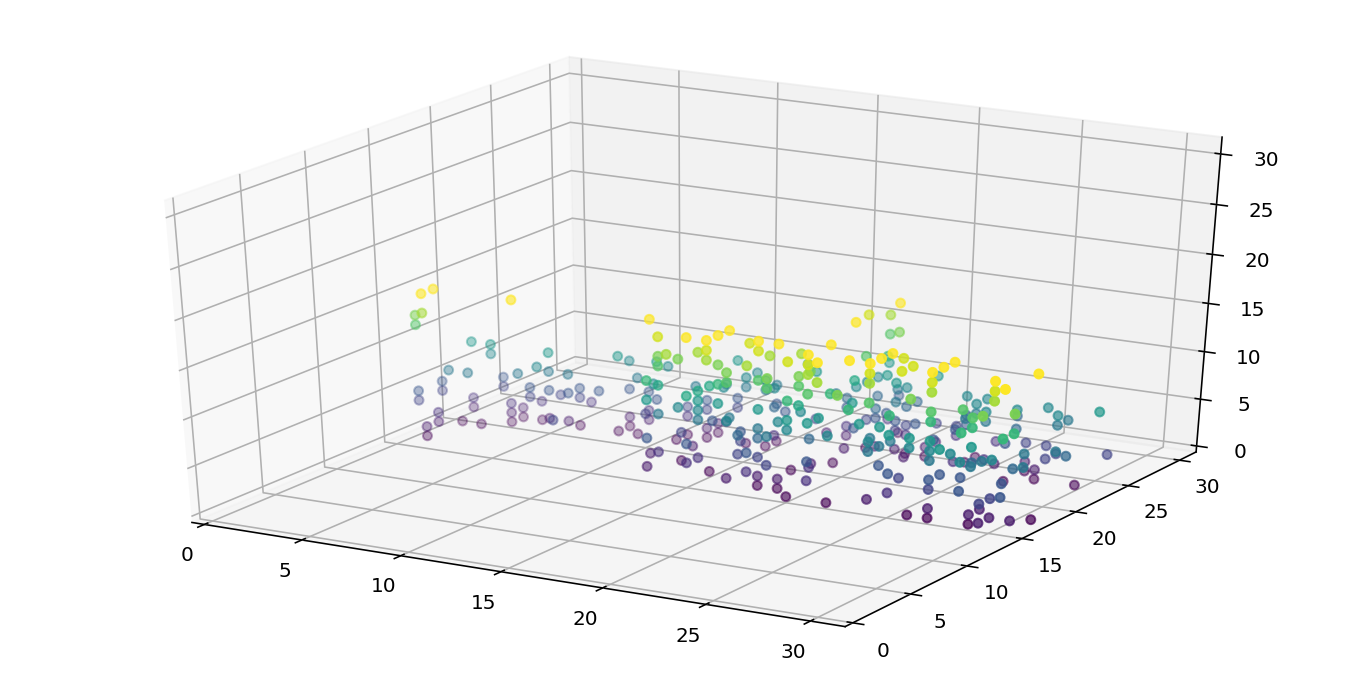

In [24]:
plot_segment_voxelbox(voxelbox=segment_voxelbox)